In [1]:
import os
from imageio import imread
import numpy as np

def read_image(folder_path):
    """
    read the image and store its array and label in lists

    Args:
        folder_path (str): the path of folder,that contains the images

    Returns:
        features(numpy.array): a matrix of vectorized images
        labels(numpy.array): a matrix of labels of corresponding images
    """
    features, labels = [], []
    files = os.listdir(folder_path)
    for f in files:
        file_path = os.path.join(folder_path, f)
        feature = imread(file_path).flatten()
        label = int(f.split("_")[0][-2:])
        features.append(feature)
        labels.append(label)
    features = np.array(features)
    labels = np.array(labels)
    return features, labels

# load training data
train_data_path = "yaleBfaces/subset0"
features_train_data, label_train_data = read_image(train_data_path)

# load test data
test_data = [] 
for i in range(1, 5, 1):
    test_data_path = "yaleBfaces/subset" + (str(i))
    features_test_data, label_test_data = read_image(test_data_path)
    test_data.append([features_test_data, label_test_data])

# print the first 3 vectorized images in training data
for i in range(3):
    print(features_train_data[i, :].reshape(50, 50),"\n")


[[ 94 114 115 ...  57  54  48]
 [ 98  93  68 ...  80  83  61]
 [ 52  54  64 ... 125 112 105]
 ...
 [ 70  68  71 ...  98  87  83]
 [ 61  61  72 ...  76  82  72]
 [ 54  57  65 ...  76  67  70]] 

[[ 93 109 112 ...  66  63  72]
 [ 92  77  68 ... 115  94  70]
 [ 48  53  67 ... 147 141 122]
 ...
 [ 82  70  71 ... 124 117  93]
 [ 67  65  79 ... 117 106  88]
 [ 61  60  75 ...  97  79  99]] 

[[ 85  97 104 ...  56  56  86]
 [ 93  95  73 ...  62  56  47]
 [ 56  46  47 ... 109 100  83]
 ...
 [ 54  49  51 ...  88  85  71]
 [ 41  40  56 ...  75  74  61]
 [ 35  33  46 ...  63  53  58]] 



In [2]:
def compute_singular_values(T):
    """
    compute the 20 first singular vectors of input matrix

    Args:
        T (numpy.array): vectorized images

    Returns:
        u_20(numpy.array): a matrix,that contains the 20 first singular vectors

    """
    u = np.linalg.svd(T.T)[0]
    u_20 = u[:, :20]
    return u_20

u_20 = compute_singular_values(features_train_data)
print(u_20)

[[-0.01048732  0.03392782 -0.01377794 ...  0.01006128  0.00030659
   0.0011373 ]
 [-0.01025498  0.03264884 -0.00790541 ...  0.03563369  0.0162163
   0.0049596 ]
 [-0.01048144  0.03866268 -0.00335353 ...  0.0236887   0.01183814
  -0.01046364]
 ...
 [-0.01413924 -0.00640562  0.03567342 ... -0.00338551 -0.01494478
  -0.00590317]
 [-0.01240749  0.00043264  0.03926606 ... -0.00628929 -0.0059918
  -0.00230929]
 [-0.01122921 -0.00342655  0.04124219 ...  0.00313863 -0.00602408
  -0.00187178]]


In [7]:
def knn(T, label_T, S, label_S, u_20, k):
    """
    reduce the dimension of training and test data,
    classify the data with K-Nearest-Neighbour(KNN) Algorithm
    
    Args:
        T (numpy.array): training set
        label_T (numpy.array): labels of training set
        S (numpy.array): test set
        label_S (numpy.array): labels of test set
        u_20 (numpy.array): 20 first singular vectors of training set
        k (int): how many of the PCs are used

    Returns:
        error_rate(float): error rate, that the images of test set are misclassified
    """
    # reduce feature space of train data and test data
    T_r = np.dot(T, u_20[:, :k])
    S_r = np.dot(S, u_20[:, :k])

    predict_labels = []
    for i in range(S_r.shape[0]):
        # compute Euclidean distance
        e_distance = np.linalg.norm(np.subtract(T_r, S_r[i, :]), axis=1)
        index_nearest_3 = e_distance.argsort()[:3]
        # count mode and get predicted label
        counts = np.bincount(label_T[index_nearest_3])
        predict_label = np.argmax(counts)
        predict_labels.append(predict_label)

    # calculate error rate
    count_success_predict = sum([1 for i in range(len(label_S)) if predict_labels[i] == label_S[i]])
    error_rate = count_success_predict / len(label_S)
    return error_rate

# get the error rate of test data from subset 1-4 for different k 
error_rates=[]
for i in range(4):
    error_rates_for_subset_i=[]
    for k in range(1,21,1):
        error_rate=knn(features_train_data, label_train_data, test_data[i][0], test_data[i][1], u_20, k)
        error_rates_for_subset_i.append(error_rate)
    error_rates.append(error_rates_for_subset_i)

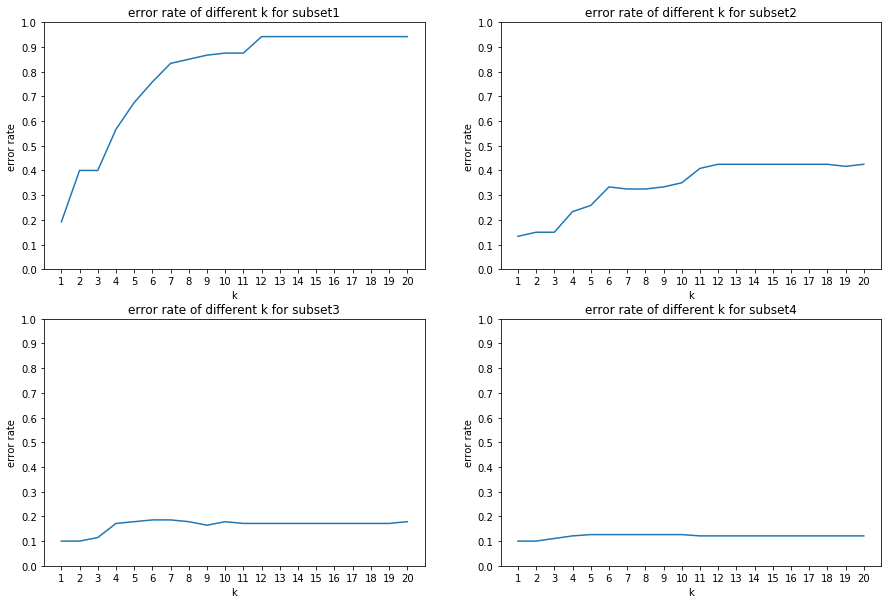

In [8]:
import matplotlib.pyplot as plt
# plot 
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(range(1,21,1),error_rates[i])
    plt.title("error rate of different k for subset{}".format(i+1))
    plt.xlabel("k")
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(1,21,1))
    plt.ylabel("error rate")

plt.show()

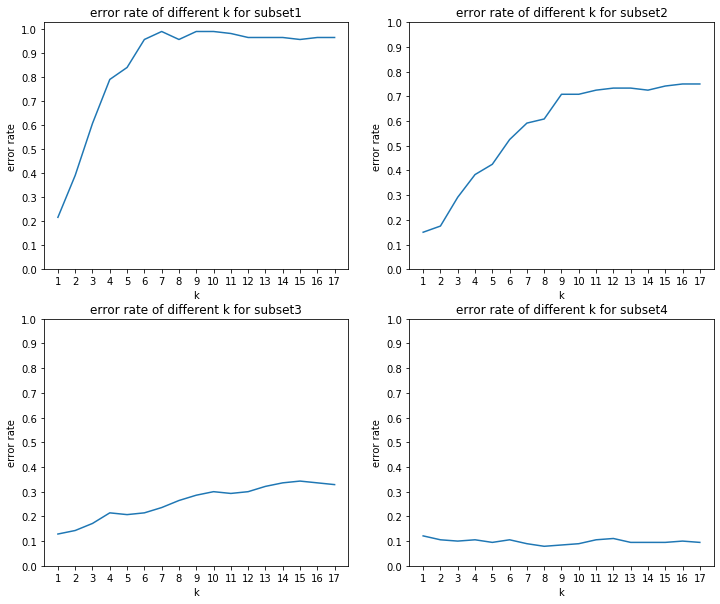

In [10]:
# new singular vector
u17=u_20[:,3:]

# get the error rate of test data from subset 1-4 for different k
error_rates_17=[]
for i in range(4):
    error_rates_for_subset_i=[]
    for k in range(1,18,1):
        error_rate=knn(features_train_data, label_train_data, test_data[i][0], test_data[i][1], u17, k)
        error_rates_for_subset_i.append(error_rate)
    error_rates_17.append(error_rates_for_subset_i)

# plot
plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(range(1,18,1),error_rates_17[i])
    plt.title("error rate of different k for subset{}".format(i+1))
    plt.xlabel("k")
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(1,18,1))
    plt.ylabel("error rate")
plt.show()

##### Conclusion:
The first 3 vectors are corresponding to the biggest 3 singular values, that contain the most information of images.In this experiment the most information are not useful but harmful for classification, which means data without those information increase the error rate.

For subset4...
